# Import data from file

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
sol_data = pd.read_csv("SOL-USD.csv", index_col = 0)

In [27]:
sol_data.index.min()

'2020-05-01'

In [28]:
sol_data.index.max()

'2024-07-22'

In [29]:
sol_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-01,0.691045,0.737071,0.685903,0.728794,0.728794,4164272
2020-05-02,0.727268,0.748981,0.707904,0.715876,0.715876,3441356
2020-05-03,0.714796,0.729801,0.656616,0.679535,0.679535,3328344
2020-05-04,0.679625,0.705812,0.618434,0.667491,0.667491,3443698
2020-05-05,0.673440,0.686214,0.626499,0.641837,0.641837,2847469


In [30]:
sol_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [31]:
sol_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 2020-05-01 to 2024-07-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1544 non-null   float64
 1   High       1544 non-null   float64
 2   Low        1544 non-null   float64
 3   Close      1544 non-null   float64
 4   Adj Close  1544 non-null   float64
 5   Volume     1544 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 84.4+ KB


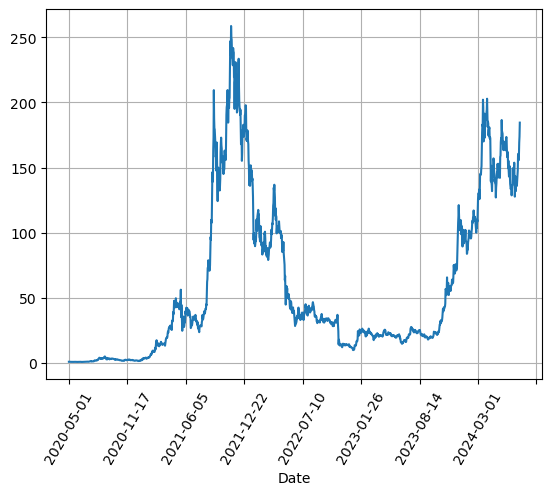

In [84]:
ax = sol_data["Open"].plot(grid = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
plt.show()

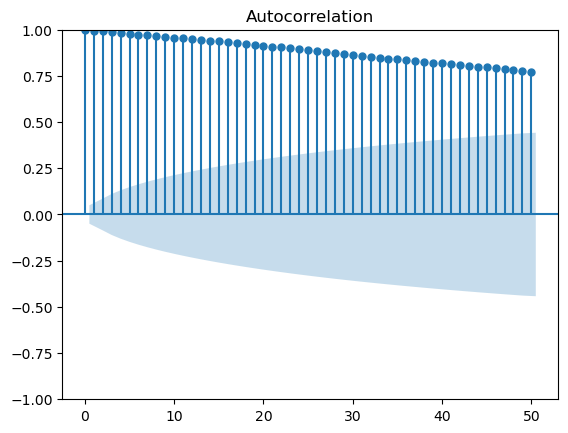

In [88]:
plot_acf(sol_data["Open"], lags = 50)
plt.show()

# Data transformation

In [107]:
dates = sol_data.reset_index()['Date']
open_price = np.log(sol_data.reset_index()['Open'].values)

In [110]:
open_price

array([-0.36955033, -0.31846023, -0.33575809, ...,  5.13097871,
        5.15844441,  5.21766294])

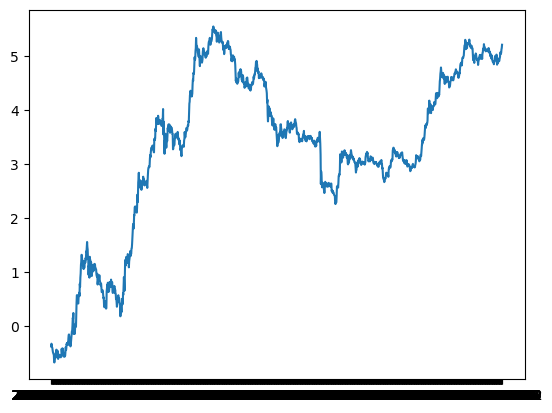

In [109]:
plt.plot(dates, open_price)

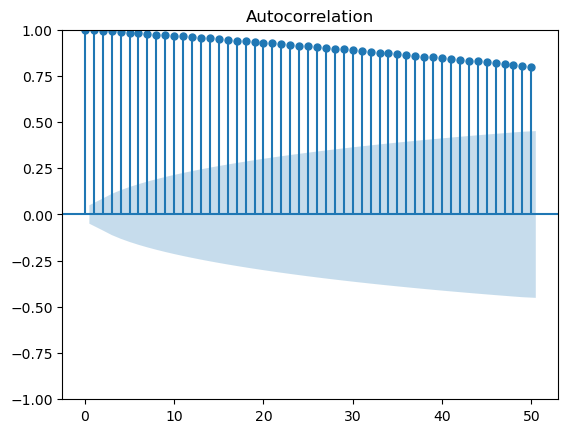

In [148]:
plot_acf(open_price, lags = 50)
plt.show()

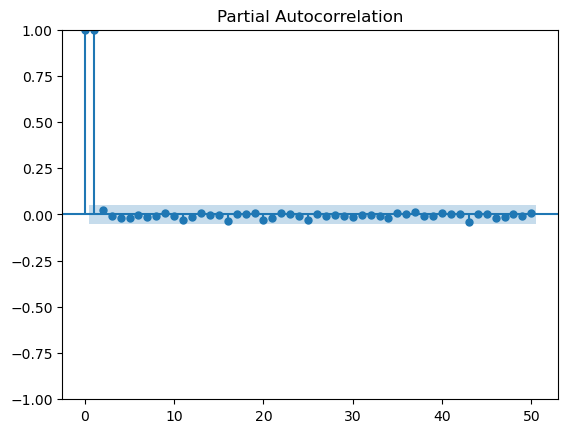

In [149]:
plot_pacf(open_price, lags = 50)
plt.show()

# Linear regression

In [120]:
from sklearn.linear_model import LinearRegression

In [144]:
# fit a regression model on t
lr_model = LinearRegression()
index = sol_data.reset_index().index.values.reshape(-1,1)
lr_model.fit(index, open_price)
t_prediction = lr_model.predict(index)
t_residuals = open_price - t_prediction
print("MSE with linear fit:", np.mean((t_residuals)**2))

MSE with linear fit: 1.4927488205995738


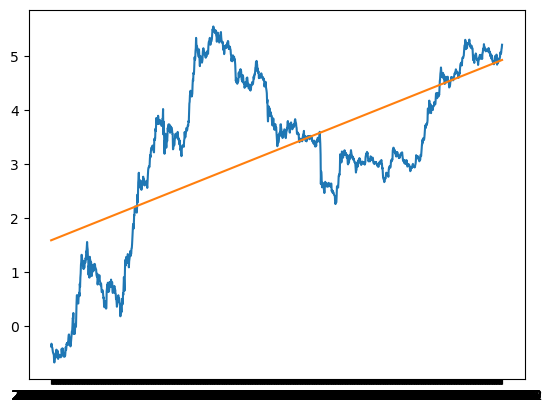

In [127]:
plt.plot(dates, open_price.reshape(-1,1))
plt.plot(dates, t_prediction)

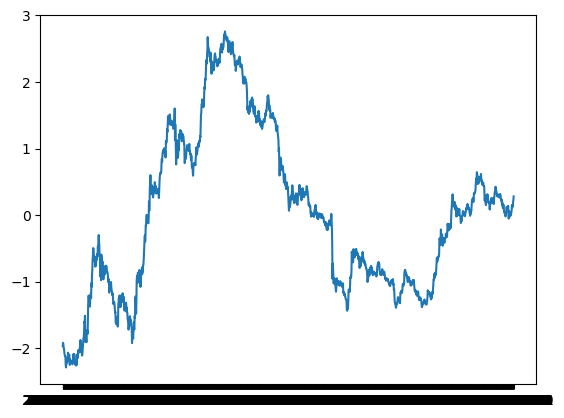

In [130]:
plt.plot(dates, t_residuals)

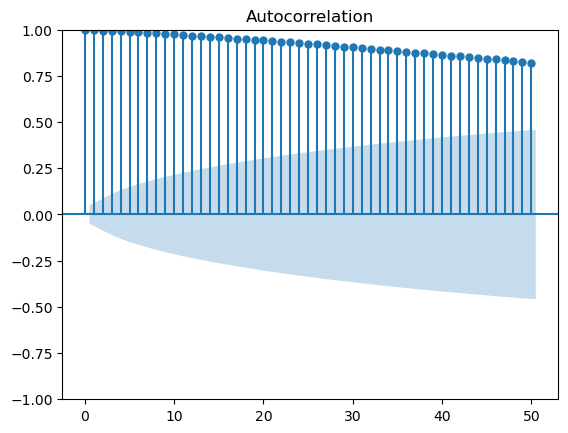

In [131]:
plot_acf(t_residuals, lags = 50)
plt.show()

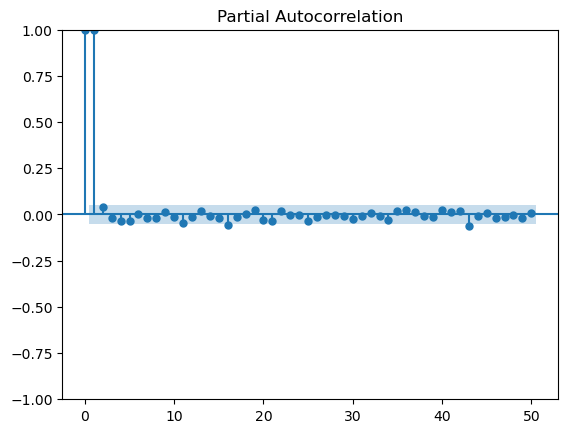

In [147]:
plot_pacf(t_residuals, lags = 50)
plt.show()

# Polynomial regression

In [167]:
# wonderfully overfitted
new_x = np.hstack((index, index **2, index**3, index**4, index**5))
lr_model.fit(new_x, open_price)
print(lr_model.coef_)
tsq_prediction = lr_model.predict(new_x)
tsq_residuals = open_price - tsq_prediction
print("MSE:", np.mean((tsq_residuals)**2))
#print("AIC:", evaluate_AIC(2, tsq_residuals))
#print("BIC:", evaluate_BIC(2, tsq_residuals))

[-1.30575262e-02  1.28135114e-04 -2.48988040e-07  1.81994542e-10
 -4.54043270e-14]
MSE: 0.17310840736664584


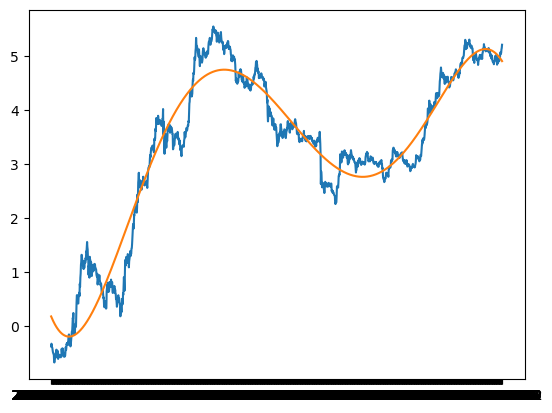

In [162]:
plt.plot(dates, open_price.reshape(-1,1))
plt.plot(dates, tsq_prediction)

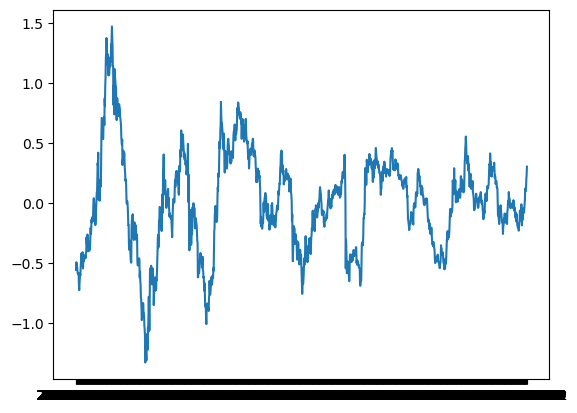

In [163]:
plt.plot(dates, tsq_residuals)

Seems to me like it's a diminishing variance.

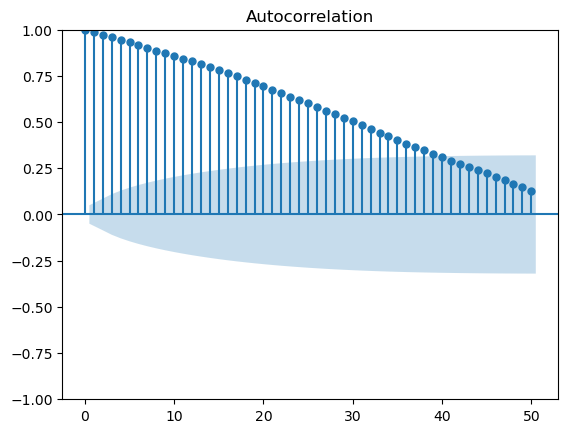

In [164]:
plot_acf(tsq_residuals, lags = 50)
plt.show()

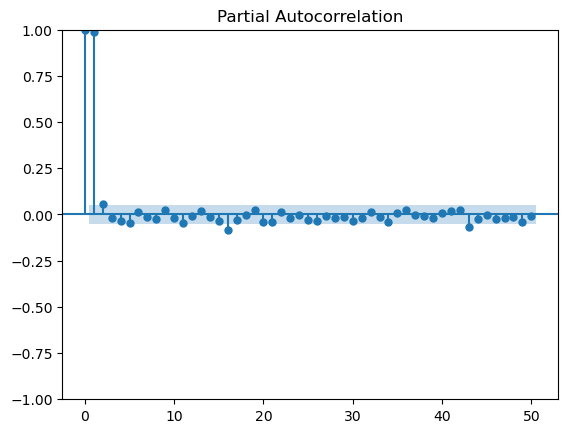

In [165]:
plot_pacf(tsq_residuals, lags = 50)
plt.show()